## Clasificador que reconoce dígitos escritos a mano en SVM

En este tutorial, utilizaremos SVM(Support Vector Machine) para construir un clasificador "classifier" para resolver el problema de reconocimiento de dígitos (escritos a mano) utilizando python (https://www.python.org) como lenguaje de programación y la librería SciKit (http://scikit-learn.org/stable/)
Utilizamos una base de datos, llamada MNIST, que contiene las imágenes de los dígitos escritos a manos. Este set de entrenamiento (training set) tiene 60000 ejemplos y el set de pruebas (test set) contiene 10000 ejemplos.

Contamos con la carpeta 'MNIST_data', que contiene el **"data set"** para el *training* y el *testing*.

Para descomprimir todos los datos en ese folder:

    $ gzip MNIST_data/*.gz -d


y no olvides instalar python-mnist, así:

    $ pip install python-mnist

In [1]:
# importar las librerias

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from mnist import MNIST

In [2]:
#importar el dataset
mnist = MNIST('MNIST_data')

# cargar la data de training (features -> images y labels -> labels)
images, labels = mnist.load_training()

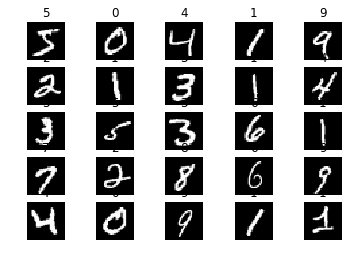

In [3]:
# vemos el contenido del data set, graficamos 25 imagenes del dataset de training
plt.gray()
for i in range(25):
    plt.subplot(5,5,i+1)
    aux_image = np.array(images[i], dtype='float')
    pixels = aux_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.title(labels[i])
    plt.axis('off')
plt.show()

Es importante evaluar el rendimiento de un clasificador, en nuestro caso utilizando el algoritmo SVM.
A continuación un método para evaluar nuestros clasificador SVM.

Introducimos los conceptos:
* Confusion matrix / Matrix de confusión
* Score / puntuación

In [4]:
# definimos una funcion para evaluar el clasificador

def evaluate_classifier(clf, test_data, test_labels):
    pred = clf.predict(test_data)
    C = confusion_matrix(test_labels, pred)
    return C.diagonal().sum()*100./C.sum(),C

In [5]:
# opcion 1 - division manual data: training-testing
# training 70% y testing 30%
train_data, test_data, train_labels, test_labels = train_test_split(images, labels, test_size=0.3, random_state=42)

In [6]:
len(train_data)

42000

In [7]:
# importamos librerías para construir nuestro clasificador

# NumPy es una extensión de Python, que le agrega mayor soporte para vectores y matrices
import numpy as np

# de la librería SVM importamos SVC: C-Support Vector Classification
from sklearn.svm import SVC

Hora de entrenar nuestro **"CLASIFICADOR"**

Usamos de la librería **SciKit-learn**, el algoritmo ya definido de **SVM**, que nos permite definir los siguientes "hiperparámetros"


class sklearn.svm.SVC (C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)


C = penalidad kernel = tipo de kernel a utilizar en el algoritmo: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
En nuestro caso, probamos con rbf, que es popular en Machine Learning para un clasificador SVM. RBF Radial Basis Function

In [ ]:
# testing/probando... 
# definimos el clasificador
clf = SVC(C=1.0, kernel='rbf')

# entrenamos el clasificador
clf.fit(train_data, train_labels)

In [ ]:
# vamos a evaluar nuestro clasificador con todo el "training" y "testing" set
s,C = evaluate_classifier(clf, test_data, test_labels)

# veremos el "score" y "confusion matrix" de nuestro clasificador elegido
print s
print C

Entrenando el clasificador con SVM puede tomar algunos minutos...  "paciencia"

Después de varias pruebas encontramos:
que 13<=C>=15 nos da un valor decente.

In [ ]:
# finalmente definimos nuestro "mejor clasificador"
clf = SVC(C=14, kernel='rbf')

# entrenamos el clasificador toda nuestra data definida en un principio (no más StratifiedKFold)
clf.fit(train_data, train_labels)

In [ ]:
# vamos a evaluar nuestro clasificador con todo el "training" y "testing" set
s,C = evaluate_classifier(clf, test_data, test_labels)

In [ ]:
# veremos el "score" y "confusion matrix" de nuestro clasificador elegido
print s
print C

Antes de avanzar, podemos hacer un par de pruebas

In [ ]:
# Elegimos al azar una imagen del dataset de prueba. Index 8y lo graficamos para identificar q digito es

d = test_data[10]
d = np.array(d, dtype='float')
pixels = d.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [ ]:
# Aplicamos el clasificador a este index para ver el resultado
print(clf.predict( [test_data[10]]))

Una vez nuestro **clasificador** este listo, podemos usar nuestro testing data

In [ ]:
# testing data

final_test_data, final_test_labels = mndata.load_testing()

In [ ]:
# evaluamos con todo el MNIST
sFinal,CFinal = evaluate_classifier(clf, final_test_data, final_test_labels)

# veamos que tan bueno eso
print sFinal
print CFinal

**Conclusiones**
Clasificador SVM funciona! al parecer podemos tener 90% de seguridad que nos dirá el digito correcto de la imagen.

----------------------
Extra.


In [ ]:
# de la librería SVM: StratifiedKFold para dividir nuestro data set en "train/test sets"
from sklearn.cross_validation import StratifiedKFold

In [ ]:
# SVM toma mucho tiempo en entrenarse, usaremos solo 1/10 de toda la data
kf = StratifiedKFold(train_labels, 10 )

# iteramos y definimos, data_x como la info de los imagenes de los dígitos y data_y como el "label" (usamos SUPERVISE LEARNING)
for big,small in kf:
    data_x = train_data[small]
    data_y = train_labels[small]
    break

In [ ]:
# nuestro data set esta listo!
print(data_x.shape)
print(data_y.shape)

In [ ]:
# para entrenar dividimos todo el "training set" en 4 grupos, cada grupo tiene su parte de "training" y "testing"
kf_test = StratifiedKFold(data_y.argmax(axis=1), 4)

In [ ]:
# finalmente definimos nuestro "mejor clasificador"
clf = SVC(C=14, kernel='rbf')

# entrenamos el clasificador toda nuestra data definida en un principio (no más StratifiedKFold)
clf.fit(data_x, data_y.argmax(axis=1))

In [ ]:
# vamos a evaluar nuestro clasificador con todo el "training" y "testing" set
s,C = evaluate_classifier(clf, data_x, data_y)

In [ ]:
# veremos el "score" y "confusion matrix" de nuestro clasificador elegido
print s
print C

In [ ]:
# evaluamos con todo el MNIST
sFinal,CFinal = evaluate_classifier(clf, final_test_data, final_test_labels)

# veamos que tan bueno eso
print sFinal
print CFinal